# Make style folders

### StyTr2

In [4]:
import os
import re
import shutil
from tqdm import tqdm
from PIL import Image

output = "FID-StyTr-resized"
os.makedirs(output, exist_ok=True)

stylized_dir = "../StyTR-2/out_selftrained"
output_style = os.path.join(output, "style-ours")
output_stylized = os.path.join(output, "stylized-ours")

style_dir = "../data/style_test_small"

if os.path.exists(output_style):
    shutil.rmtree(output_style)
    
if os.path.exists(output_stylized):
    shutil.rmtree(output_stylized)

os.makedirs(output_style, exist_ok=True)
os.makedirs(output_stylized, exist_ok=True)

imgs = [file for file in os.listdir(stylized_dir)]
c = 0

for fname in tqdm(imgs, desc="Resizing images", unit="image"):
    if not "stylized_" in fname:
        continue
    try:
        with Image.open(os.path.join(stylized_dir, fname)) as img:
            img_resized = img.resize((299, 299), Image.LANCZOS)
            img_resized.save(os.path.join(output_stylized, str(c) + ".jpg"))
    except Exception as e:
        print(f"❌ Failed to process {fname}: {e}")
    
    im = fname.split("stylized_")[1]
    src_path = os.path.join(style_dir, im)

    if os.path.isfile(src_path):
        try:
            with Image.open(src_path) as img:
                img_resized = img.resize((299, 299), Image.LANCZOS)
                img_resized.save(os.path.join(output_style, str(c) + ".jpg"))
        except Exception as e:
            print(f"❌ Failed to process {im}: {e}")
    else:
        print(f"⚠️ File not found: {im}")
    c +=1

Resizing images: 100%|██████████| 2025/2025 [01:16<00:00, 26.42image/s]


In [9]:
output = "FID-StyTr-resized"
stylized_dir = "../StyTR-2/out1"
output_style = os.path.join(output, "style")
output_stylized = os.path.join(output, "stylized")

style_dir = "../data/style_test_small"

if os.path.exists(output_style):
    shutil.rmtree(output_style)
    
if os.path.exists(output_stylized):
    shutil.rmtree(output_stylized)

os.makedirs(output_style, exist_ok=True)
os.makedirs(output_stylized, exist_ok=True)

imgs = [file for file in os.listdir(stylized_dir)]
c = 0

for fname in tqdm(imgs, desc="Resizing images", unit="image"):
    if not "stylized_" in fname:
        continue
    try:
        with Image.open(os.path.join(stylized_dir, fname)) as img:
            img_resized = img.resize((299, 299), Image.LANCZOS)
            img_resized.save(os.path.join(output_stylized, str(c) + ".jpg"))
    except Exception as e:
        print(f"❌ Failed to process {fname}: {e}")
    
    im = fname.split("stylized_")[1]
    src_path = os.path.join(style_dir, im)

    if os.path.isfile(src_path):
        try:
            with Image.open(src_path) as img:
                img_resized = img.resize((299, 299), Image.LANCZOS)
                img_resized.save(os.path.join(output_style, str(c) + ".jpg"))
        except Exception as e:
            print(f"❌ Failed to process {im}: {e}")
    else:
        print(f"⚠️ File not found: {im}")
    c +=1

Resizing images: 100%|██████████| 20251/20251 [13:08<00:00, 25.70image/s]


### AdaAttN

In [13]:
import os
import shutil
from tqdm import tqdm

output = "FID-AdaAttN-resized"
os.makedirs(output, exist_ok=True)

output_1 = os.path.join(output, "ours")
output_2 = os.path.join(output, "original")

os.makedirs(output_1, exist_ok=True)
os.makedirs(output_2, exist_ok=True)

ours = "../AdaAttN/results/AdaAttN_retrain/test_latest/images"
original = "../AdaAttN/results/AdaAttN/test_latest/images"

# Copy _cs.png images from 'ours' folder
files_ours = [f for f in os.listdir(ours) if f.endswith("_cs.png")]
for file in tqdm(files_ours, desc="Copying from ours"):
    shutil.copy(os.path.join(ours, file), output_1)

# Copy _cs.png images from 'original' folder
files_original = [f for f in os.listdir(original) if f.endswith("_cs.png")]
for file in tqdm(files_original, desc="Copying from original"):
    shutil.copy(os.path.join(original, file), output_2)


Copying from original: 100%|██████████| 20250/20250 [02:01<00:00, 166.60it/s]


## Content

In [13]:
import os
import shutil
from PIL import Image
from tqdm import tqdm
from torchvision import transforms

def resize_images(input_dir, output_dir, num_images=None):
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir)

    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_files.sort()  # Optional: sort to get consistent results
    if num_images is not None:
        image_files = image_files[:num_images]

    for filename in tqdm(image_files, desc=f"Resizing images in {input_dir}"):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        with Image.open(input_path) as img:
            resized_img = img.resize((512, 512), Image.LANCZOS)
            resized_img.save(output_path)

def resize_n_crop_images(input_dir, output_dir, num_images=None, target_size=512):
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir)

    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_files.sort()  # Optional: sort to get consistent results
    if num_images is not None:
        image_files = image_files[:num_images]

    for filename in tqdm(image_files, desc=f"Resizing images in {input_dir}"):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        with Image.open(input_path) as img:
            # Step 1: Resize so the smaller side is 512, keeping aspect ratio
            width, height = img.size
            if width < height:
                new_width = target_size
                new_height = int(height * (target_size / width))
            else:
                new_height = target_size
                new_width = int(width * (target_size / height))
        
            img_resized = img.resize((new_width, new_height), Image.LANCZOS)
        
            # Step 2: Center crop to 512x512
            left = (new_width - target_size) // 2
            top = (new_height - target_size) // 2
            right = left + target_size
            bottom = top + target_size

            crop = transforms.CenterCrop(512)
            img_cropped = img_resized.crop((left, top, right, bottom))
            
            img_cropped.save(output_path)

In [14]:
# Resize content images
#resize_images("../data/content_test_small", "resized_content_test_small", num_images=20)
resize_n_crop_images("../data/content_test_small", "resized_content_test_small")

Resizing images in ../data/content_test_small: 100%|██████████| 250/250 [00:02<00:00, 99.22it/s] 


In [15]:
# Resize style images (delete folder if it exists)
#resize_images("../data/style_test_small", "resized_style_test_small", num_images=40)
resize_n_crop_images("../data/style_test_small", "resized_style_test_small")

Resizing images in ../data/style_test_small: 100%|██████████| 81/81 [00:03<00:00, 26.85it/s]


In [19]:
# Paths to folders containing images
path_gen = "./FID-AdaAttN-resized/ours"
path_real = "./resized_content_test_small"

# Calculate FID
fid_value = fid_score.calculate_fid_given_paths(
    [path_real, path_gen],
    batch_size=64,
    device="cuda:1",  # or "cpu"
    dims=2048,        # Dimensionality of Inception v3 features
)

print(f"FID: {fid_value:.2f}")

100%|██████████| 317/317 [03:24<00:00,  1.55it/s]


FID: 189.97


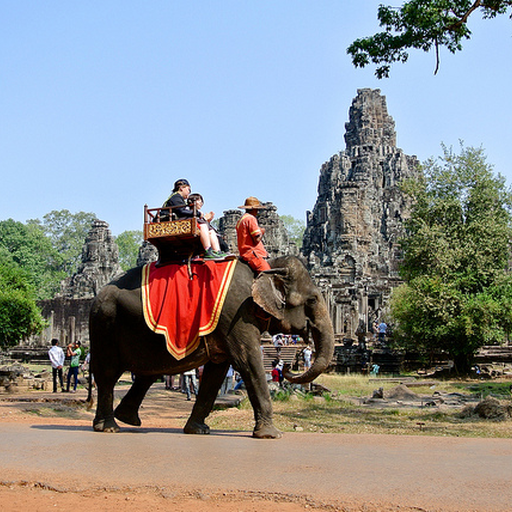

In [10]:

def resize_and_centercrop(img, target_size=512):
    # Step 1: Resize so the smaller side is 512, keeping aspect ratio
    width, height = img.size
    if width < height:
        new_width = target_size
        new_height = int(height * (target_size / width))
    else:
        new_height = target_size
        new_width = int(width * (target_size / height))

    img_resized = img.resize((new_width, new_height), Image.LANCZOS)

    # Step 2: Center crop to 512x512
    left = (new_width - target_size) // 2
    top = (new_height - target_size) // 2
    right = left + target_size
    bottom = top + target_size

    img_cropped = img_resized.crop((left, top, right, bottom))
    return img_cropped
with Image.open("../data/content_test_small/000000042933.jpg") as img:
    image = resize_and_centercrop(img)
image

In [29]:
[itm for itm in os.listdir("resized_style_test_small")]

['j.-e.-h.-macdonald_valley-and-stream-oesa-trail-lake-o-hara-1930.jpg',
 'francesco-guardi_venetian-capriccio-1780.jpg',
 'domenico-ghirlandaio_st-christopher.jpg',
 'august-macke_house-in-a-landscape.jpg',
 'hiroshige_cherry-tree.jpg',
 'alice-baber_the-way-of-the-wind-1977.jpg',
 'jack-bush_three-and-blue-loop-1971.jpg',
 'fred-sandback_blue-day-glo-corner-piece-1968.jpg',
 'anna-ostroumova-lebedeva_gear-1917.jpg',
 'guido-reni_david-and-goliath-1610.jpg',
 'fra-angelico_st-jerome-1440.jpg',
 'brice-marden_untitled-1970.jpg',
 'elaine-de-kooning_thomas-b-hess-1956.jpg',
 'ito-jakuchu_birds-animals-and-flowering-plants-in-imaginary-scene-1.jpg',
 'jackson-pollock_number-1(1).jpg',
 'adriaen-brouwer_peasants-playing-cards-in-a-tavern.jpg',
 'andy-warhol_old-fashioned-vegetable.jpg',
 'franz-kline_untitled-1956.jpg',
 'edward-hopper_self-portrait.jpg',
 'george-bouzianis_topio-sto-aixenaou-1925.jpg',
 'andy-warhol_carter-burden-brown.jpg',
 'ivan-kramskoy_portrait-of-olga-afanasiyevna-

In [ ]:
def is_style_content_combination(filename):
    return (
        filename.endswith("_cs.png") and
        "_s" in filename and
        "_c" in filename
    )

output = "FID-AdaAttN-resized"
os.makedirs(output, exist_ok=True)

output_1 = os.path.join(output, "ours")
output_2 = os.path.join(output, "original")

os.makedirs(output_1, exist_ok=True)
os.makedirs(output_2, exist_ok=True)

ours = "../AdaAttN/results/AdaAttN_retrain/test_latest/images"
original = "../AdaAttN/results/AdaAttN/test_latest/images"

# Filter only _cs.png files that contain both _s and _c
files_ours = [f for f in os.listdir(ours) if is_style_content_combination(f)]
files_original = [f for f in os.listdir(original) if is_style_content_combination(f)]

# Copy from 'ours'
for file in tqdm(files_ours, desc="Copying from ours"):
    shutil.copy(os.path.join(ours, file), output_1)

# Copy from 'original'
for file in tqdm(files_original, desc="Copying from original"):
    shutil.copy(os.path.join(original, file), output_2)

# FID

In [16]:
import scipy
print(scipy.__version__)

1.11.1


In [11]:
# Paths to folders containing images
path_gen = "../StyTR-2/out_selftrained"
path_real = "./resized_style_test_small"

# Calculate FID
fid_value = fid_score.calculate_fid_given_paths(
    [path_real, path_gen],
    batch_size=64,
    device="cuda:1",  # or "cpu"
    dims=2048,        # Dimensionality of Inception v3 features
)

print(f"FID: {fid_value:.2f}")

100%|██████████| 32/32 [00:09<00:00,  3.28it/s]


FID: 687.94


In [18]:
from pytorch_fid import fid_score
# Paths to folders containing images
path_gen = "../StyTR-2/out1"
path_real = "./resized_style_test_small"

# Calculate FID
fid_value = fid_score.calculate_fid_given_paths(
    [path_real, path_gen],
    batch_size=64,
    device="cuda:1",  # or "cpu"
    dims=2048,        # Dimensionality of Inception v3 features
)

print(f"FID: {fid_value:.2f}")

100%|██████████| 317/317 [01:52<00:00,  2.83it/s]


FID: 258.62


In [14]:
# Paths to folders containing images
path_gen = "./FID-AdaAttN-resized/ours"
path_real = "./resized_style_test_small"

# Calculate FID
fid_value = fid_score.calculate_fid_given_paths(
    [path_real, path_gen],
    batch_size=64,
    device="cuda:1",  # or "cpu"
    dims=2048,        # Dimensionality of Inception v3 features
)

print(f"FID: {fid_value:.2f}")

100%|██████████| 317/317 [03:32<00:00,  1.49it/s]


FID: 241.01


In [15]:
# Paths to folders containing images
path_gen = "./FID-AdaAttN-resized/original"
path_real = "./resized_style_test_small"

# Calculate FID
fid_value = fid_score.calculate_fid_given_paths(
    [path_real, path_gen],
    batch_size=64,
    device="cuda:1",  # or "cpu"
    dims=2048,        # Dimensionality of Inception v3 features
)

print(f"FID: {fid_value:.2f}")

100%|██████████| 317/317 [03:26<00:00,  1.53it/s]


FID: 248.01


# Other stuf (not in use)

In [12]:
import os
import subprocess
import torch
from pytorch_fid import fid_score

style_dir = "../data/style_test_small"
stylized_dir = "../StyTR-2/out1/"
temp_dir = 'grouped_pre_all_stylized'

# Group stylized images by style
os.makedirs(temp_dir, exist_ok=True)
for fname in os.listdir(stylized_dir):
    if '_stylized_' in fname:
        style = fname.split('_stylized_')[-1].split('.')[0]
        style_folder = os.path.join(temp_dir, style)
        os.makedirs(style_folder, exist_ok=True)

        src = os.path.join(stylized_dir, fname)
        dst = os.path.join(style_folder, fname)
        if not os.path.exists(dst):
            os.symlink(os.path.abspath(src), dst)  # or shutil.copy if you prefer

# Run FID for each style
#for style_name in os.listdir(style_dir):
#    style_path = os.path.join(style_dir, style_name)
#    style_base = os.path.splitext(style_name)[0]
#    stylized_path = os.path.join(temp_dir, style_base)
#
#    if os.path.isdir(stylized_path):
#        print(f"Running FID for style '{style_base}'")
#        fid_value = fid_score.calculate_fid_given_paths(
#            [style_path, stylized_path],
#            batch_size=50,
#            device='cuda' if torch.cuda.is_available() else 'cpu',
#            dims=2048
#        )
#        print(f"FID for style '{style_base}': {fid_value}")


In [18]:
import os
import shutil
import subprocess
from PIL import Image

def ensure_folder(path):
    os.makedirs(path, exist_ok=True)
    # Clear folder
    for f in os.listdir(path):
        os.remove(os.path.join(path, f))

def copy_style_n_times(style_path, out_folder, n):
    for i in range(n):
        shutil.copy(style_path, os.path.join(out_folder, f"{i:04d}.jpg"))

def compute_fid(real_dir, fake_dir, device="cuda"):
    result = subprocess.run(
        ["python", "-m", "pytorch_fid", real_dir, fake_dir, "--device", device],
        capture_output=True, text=True
    )
    return result.stdout.strip()

def per_style_fid(stylized_root, style_root, tmp_root="fid_temp", device="cuda"):
    styles = [d for d in os.listdir(stylized_root) if os.path.isdir(os.path.join(stylized_root, d))]
    fid_results = {}

    for style_name in styles:
        print(f"Processing style: {style_name}")
        stylized_dir = os.path.join(stylized_root, style_name)
        style_img_path = os.path.join(style_root, f"{style_name}.jpg")

        if not os.path.isfile(style_img_path):
            print(f"  → Skipping {style_name}: style image not found at {style_img_path}")
            continue

        # Prepare temp folders
        fake_folder = os.path.join(tmp_root, "fake")
        real_folder = os.path.join(tmp_root, "real")
        ensure_folder(fake_folder)
        ensure_folder(real_folder)

        # Copy stylized images
        for fname in os.listdir(stylized_dir):
            if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                shutil.copy(os.path.join(stylized_dir, fname), os.path.join(fake_folder, fname))

        n = len(os.listdir(fake_folder))
        if n == 0:
            print(f"  → No stylized images found for {style_name}")
            continue

        # Duplicate style image
        copy_style_n_times(style_img_path, real_folder, n)

        # Run FID
        fid_score = compute_fid(real_folder, fake_folder, device=device)
        fid_results[style_name] = fid_score
        print(f"  → FID for '{style_name}': {fid_score}")

    return fid_results

# Example usage
if __name__ == "__main__":
    stylized_root = "../StyTR-2/out1"    # contains subfolders like 'feathers', 'wave', etc.
    style_root = "grouped_pre_all_stylized"        # contains 'feathers.jpg', 'wave.jpg', etc.
    fid_results = per_style_fid(stylized_root, style_root)
    print("\n=== Final Per-Style FID Scores ===")
    for style, score in fid_results.items():
        print(f"{style:20s} : {score}")


Processing style: .ipynb_checkpoints
  → Skipping .ipynb_checkpoints: style image not found at grouped_pre_all_stylized/.ipynb_checkpoints.jpg

=== Final Per-Style FID Scores ===


## Break

In [2]:
import subprocess

# Name your new environment and package specs
env_name = "scipy_env"
python_version = "3.11"
scipy_version = "1.11.1"

# Create the new environment in your user directory
try:
    subprocess.check_call([
        "conda", "create", "-y", "-n", env_name,
        f"python={python_version}", f"scipy={scipy_version}", "ipykernel", "-c", "conda-forge"
    ])
    print(f"✅ Environment '{env_name}' created successfully.")
except subprocess.CalledProcessError as e:
    print(f"❌ Failed to create environment: {e}")


Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /home/cv27f25/.conda-2024.02/envs/scipy_env

  added / updated specs:
    - ipykernel
    - python=3.11
    - scipy=1.11.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    asttokens-3.0.0            |     pyhd8ed1ab_1          28 KB  conda-forge
    brotli-python-1.1.0        |  py311hfdbb021_2         342 KB  conda-forge
    cffi-1.17.1                |  py311hf29c0ef_0         295 KB  conda-forge
    charset-normalizer-3.4.2   |     pyhd8ed1ab_0          49 KB  conda-forge
    comm-0.2.2                 |     pyhd8ed1ab_1          12 KB  conda-forge
    debugpy-1.8.14             |  py311hfdbb021_0         2.5 MB  conda-forge
    decorator-5.2.1            |     pyhd8ed1ab_0          14 KB  conda-forge
    exceptiongroup-1.2.2       |     pyhd8ed

In [3]:
try:
    subprocess.check_call([
        "python", "-m", "ipykernel", "install", "--user", "--name", env_name,
        "--display-name", f"Python ({env_name})"
    ])
    print(f"✅ Kernel '{env_name}' registered with Jupyter.")
except subprocess.CalledProcessError as e:
    print(f"❌ Failed to register kernel: {e}")


Installed kernelspec scipy_env in /home/cv27f25/.local/share/jupyter/kernels/scipy_env
✅ Kernel 'scipy_env' registered with Jupyter.


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [2]:
from pytorch_fid import fid_score

fid_value = fid_score.calculate_fid_given_paths(
    ["./FID-StyTr-resized/stylized-ours", "./FID-StyTr-resized/style-ours"],
    batch_size=32,
    device='cuda',        
    dims=2048,
)
print(f"FID: {fid_value:.2f}")


100%|██████████| 64/64 [00:12<00:00,  4.94it/s]


ValueError: Imaginary component 9.720218607863123e+106

In [26]:
from pathlib import Path
from PIL import Image

def preprocess_folder(in_folder, out_folder, size=(299, 299)):
    in_folder  = Path(in_folder)
    out_folder = Path(out_folder)
    out_folder.mkdir(exist_ok=True, parents=True)

    # only process real image files
    valid_exts = {'.jpg', '.jpeg', '.png', '.bmp'}
    for img_path in in_folder.iterdir():
        # skip if it's not a file or doesn't have a valid image suffix
        if not img_path.is_file() or img_path.suffix.lower() not in valid_exts:
            continue

        img = Image.open(img_path).convert("RGB")
        img = img.resize(size, Image.BILINEAR)
        img.save(out_folder / img_path.name)

# Usage—replace these with your own paths:
preprocess_folder("../StyTR-2/out1",     "resized_stylized_stytr")
preprocess_folder("../data/style_test_small", "resized_style_test_small")
